    
Especialização em Inteligência Artificial Aplicada - Universidade Federal do Paraná - UFPR 
    
IAA007 – Aprendizado de Máquina e Laboratório de IA    
**Prof. Dr. Jaime Wojciechowski**
    
Josué Leal Evangelista

### AGRUPAMENTO E REGRAS DE ASSOCIAÇÃO

In [1]:
# DESATIVAR MENSAGENS DE WARNINGS (warn = -1) E ATIVAR (warn = 0)
options(warn = -1)

In [2]:
# CARREGAR BIBLIOTECAS
suppressPackageStartupMessages({
library(caret)
library(e1071)
library(data.table)
library(dplyr)
library(ggplot2)
library(cowplot)
library(tidyr)
library(klaR)
library(arules)
library(datasets)
})

### 1 - AGRUPAMENTO

#### 1.1 - ÍRIS

In [3]:
# CARREGAR O DATASET ÍRIS
data(iris)
df_iris <- as.data.frame(iris)

In [4]:
head(df_iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [5]:
# QUANTIDADE DE OBSERVAÇÕES DE CADA CLASSE
table(df_iris$Species)


    setosa versicolor  virginica 
        50         50         50 

In [6]:
glimpse(df_iris)

Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.~
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.~
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.~
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.~
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s~


In [7]:
set.seed(1971)

#### APRENDIZADO - K-MEANS

In [8]:
# APRENDIZADO NÃO SUPERVISIONADO 
modelo_kmeans_iris <- kmeans(df_iris[, 3:4], centers = 3)

In [9]:
print(modelo_kmeans_iris)

K-means clustering with 3 clusters of sizes 50, 52, 48

Cluster means:
  Petal.Length Petal.Width
1     1.462000    0.246000
2     4.269231    1.342308
3     5.595833    2.037500

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
[149] 3 3

Within cluster sum of squares by cluster:
[1]  2.02200 13.05769 16.29167
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [10]:
# COLOCAR A COLUNA DE RESULTADOS DOS CLUSTERS NO DATASET ORIGINAL 
Cluster_iris <- modelo_kmeans_iris$cluster
Cluster_iris <- as.factor(Cluster_iris)
resultado_iris <- cbind(df_iris, Cluster_iris)

In [11]:
for (i in 1:nrow(resultado_iris)){
    specie <- resultado_iris[i,6]
    if (specie == '1'){
        resultado_iris$Cluster.Species[i] <- "setosa"
        }
    if (specie == '2'){
        resultado_iris$Cluster.Species[i] <- "versicolor"
        }  
    if (specie == '3'){
        resultado_iris$Cluster.Species[i] <- "virginica"
        }
}

In [12]:
head(resultado_iris, 10)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Cluster_iris,Cluster.Species
5.1,3.5,1.4,0.2,setosa,1,setosa
4.9,3.0,1.4,0.2,setosa,1,setosa
4.7,3.2,1.3,0.2,setosa,1,setosa
4.6,3.1,1.5,0.2,setosa,1,setosa
5.0,3.6,1.4,0.2,setosa,1,setosa
5.4,3.9,1.7,0.4,setosa,1,setosa
4.6,3.4,1.4,0.3,setosa,1,setosa
5.0,3.4,1.5,0.2,setosa,1,setosa
4.4,2.9,1.4,0.2,setosa,1,setosa
4.9,3.1,1.5,0.1,setosa,1,setosa


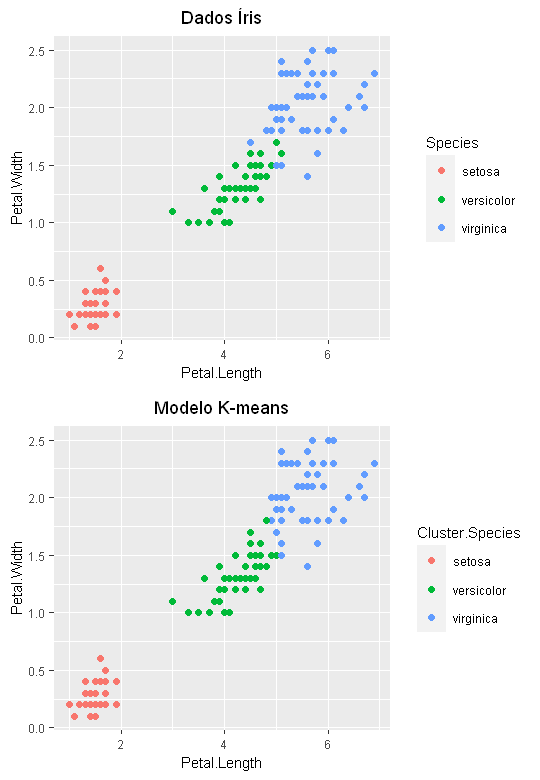

In [13]:
# GRÁFICO 1 ANTES DA GERAÇÃO DOS CLUSTERS
options(repr.plot.width = 4.5, repr.plot.height = 6.5)
grafico1 <- ggplot(df_iris, aes(Petal.Length, Petal.Width, color = Species)) + 
            geom_point() +
            labs(title = 'Dados Íris') +
            theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 9)) 


# GRÁFICO 2 COM OS CLUSTERS GERADOS
grafico2 <- ggplot(resultado_iris, aes(Petal.Length, Petal.Width, color = Cluster.Species)) + 
            geom_point() +
            labs(title = 'Modelo K-means') +
            theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 9)) 

plot_grid(grafico1, grafico2, ncol = 1, nrow = 2, align = "hv")

In [14]:
# COMPARATIVO ENTRE A CLUSTERIZAÇÃO E A CLASSIFICAÇÃO REAL
table(resultado_iris$Cluster_iris, real = df_iris$Species)

   real
    setosa versicolor virginica
  1     50          0         0
  2      0         48         4
  3      0          2        46

Conforme os gráficos e a tabela acima percebe-se que ocorreram alguns erros do algoritmo na geração de clusters. Suponhamos que o dataset original não tivesse a coluna Species (se não soubessemos as classes originais) e que a partir dos dados com os atributos Petal.Width e Petal.Length quisessemos que o algoritmo gerasse 3 clusters referentes a setosa, versicolor e virginica. Conforme visto no gráfico 2 e na tabela, o resultado seria uma definição muito próxima das classes reais. Note que o segundo gráfico ficou muito próximo do primeiro. Percebe-se alguns erros, mas está bem próximo do original. Em aprendizagem não supervisionada não temos a saída (classes: setosa, versicolor e virginica), mas com o exemplo acima e a comparação feita, percebe-se como o k-means pode ser útil, pois apresentou um ótimo desempenho chegando bem próximo do agrupamento real.

#### 1.2 - MÓVEIS

In [15]:
# CARREGAR DATASET
dados_moveis <- fread("Material 07 - 2 - Moveis - Dados.csv")
df_moveis <- as.data.frame(dados_moveis)

In [16]:
head(df_moveis)

categoria,cor,estilo
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Azul/Branco Linho,tradicional
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Rosa/Azul,tradicional
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Azul/Branco Linho,tradicional
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Rosa/Azul,tradicional
Quarto Infantil / Comoda,Branco Linho Gelo/Azul/Branco Linho,tradicional
Quarto Infantil / Comoda,Branco Linho Gelo/Rosa/Azul,tradicional


In [17]:
str(df_moveis)

'data.frame':	454 obs. of  3 variables:
 $ categoria: chr  "Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater" "Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater" "Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater" "Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater" ...
 $ cor      : chr  "Branco Linho Gelo/Azul/Branco Linho" "Branco Linho Gelo/Rosa/Azul" "Branco Linho Gelo/Azul/Branco Linho" "Branco Linho Gelo/Rosa/Azul" ...
 $ estilo   : chr  "tradicional" "tradicional" "tradicional" "tradicional" ...


#### APRENDIZADO - K-MODES

In [18]:
# APRENDIZADO NÃO SUPERVISIONADO 
modelo_kmodes_moveis <- kmodes(df_moveis, 14, iter.max = 10, weighted = FALSE ) 

In [19]:
print(modelo_kmodes_moveis)

K-modes clustering with 14 clusters of sizes 197, 30, 1, 34, 44, 3, 28, 43, 3, 11, 7, 1, 8, 44

Cluster modes:
                                                            categoria
1                                Cozinha / Balcao / Balcao em madeira
2                       Sala de Estar / Racks para TV / Racks para TV
3                       Sala de Estar / Racks para TV / Racks para TV
4                          Escritorio / Mesas / Mesas para computador
5                       Cozinha / Balcao / Balcao de canto em madeira
6                    Quarto / Cabeceiras / Cabeceiras para cama queen
7                                         Quarto do Bebe / Mini-camas
8                   Sala de Estar / Mesas para sala / Mesas de centro
9                Cozinha / Armario / Armario aereo de canto de parede
10                                Quarto Juvenil / Beliche e treliche
11                          Quarto do Bebe / Bercos / Berco americano
12                                        Sala de

In [20]:
# COLOCANDO A COLUNA DE RESULTADOS DOS CLUSTERS NO DATASET ORIGINAL 
Cluster_moveis <- modelo_kmodes_moveis$cluster
Cluster_moveis <- as.factor(Cluster_moveis)
resultado_moveis <- cbind(df_moveis, Cluster_moveis)

In [21]:
head(resultado_moveis, 10)

categoria,cor,estilo,Cluster_moveis
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Azul/Branco Linho,tradicional,13
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Rosa/Azul,tradicional,4
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Azul/Branco Linho,tradicional,13
Quarto Juvenil / Guarda-roupas / Guarda-roupas juvenil com portas de bater,Branco Linho Gelo/Rosa/Azul,tradicional,4
Quarto Infantil / Comoda,Branco Linho Gelo/Azul/Branco Linho,tradicional,13
Quarto Infantil / Comoda,Branco Linho Gelo/Rosa/Azul,tradicional,4
Quarto Infantil / Comoda,Branco Linho Gelo/Rosa/Azul/Capuccino,tradicional,4
Quarto Infantil / Comoda,Branco Linho Gelo/Capuccino/Azul/Rosa,tradicional,4
Quarto Juvenil / Cama,Branco Linho Gelo/Azul/Branco Linho,tradicional,13
Quarto Juvenil / Cama,Branco Linho Gelo/Rosa/Azul,tradicional,4


In [22]:
# COMPARATIVO ENTRE A CLUSTERIZAÇÃO E A CLASSIFICAÇÃO REAL
table(resultado_moveis$Cluster_moveis, df_moveis$estilo)

    
     moderno retro tradicional
  1      193     4           0
  2       11     8          11
  3        1     0           0
  4        0     0          34
  5       44     0           0
  6        0     0           3
  7       23     1           4
  8        0     0          43
  9        3     0           0
  10       0     0          11
  11       7     0           0
  12       1     0           0
  13       0     0           8
  14      44     0           0

#### 1.3 - CÂNCER DE MAMA

In [23]:
# CARREGAR DATASET
dados_cancer_mama <- fread("Material 02 - 2 - Cancer de Mama - Dados.csv", stringsAsFactors = TRUE)
df_cancer <- as.data.frame(dados_cancer_mama)

In [24]:
head(df_cancer)

Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1,5,1,1,1,2,1,3,1,1,benign
2,5,4,4,5,7,10,3,2,1,benign
3,3,1,1,1,2,2,3,1,1,benign
4,6,8,8,1,3,4,3,7,1,benign
5,4,1,1,3,2,1,3,1,1,benign
6,8,10,10,8,7,10,9,7,1,malignant


In [25]:
# QUANTIDADE DE OBSERVAÇÕES DE CADA CLASSE
table(df_cancer$Class)


   benign malignant 
      458       241 

In [26]:
glimpse(df_cancer)

Rows: 699
Columns: 11
$ Id              <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,~
$ Cl.thickness    <dbl> 5, 5, 3, 6, 4, 8, 1, 2, 2, 4, 1, 2, 5, 1, 8, 7, 4, 4, ~
$ Cell.size       <dbl> 1, 4, 1, 8, 1, 10, 1, 1, 1, 2, 1, 1, 3, 1, 7, 4, 1, 1,~
$ Cell.shape      <dbl> 1, 4, 1, 8, 1, 10, 1, 2, 1, 1, 1, 1, 3, 1, 5, 6, 1, 1,~
$ Marg.adhesion   <dbl> 1, 5, 1, 1, 3, 8, 1, 1, 1, 1, 1, 1, 3, 1, 10, 4, 1, 1,~
$ Epith.c.size    <dbl> 2, 7, 2, 3, 2, 7, 2, 2, 2, 2, 1, 2, 2, 2, 7, 6, 2, 2, ~
$ Bare.nuclei     <dbl> 1, 10, 2, 4, 1, 10, 10, 1, 1, 1, 1, 1, 3, 3, 9, 1, 1, ~
$ Bl.cromatin     <dbl> 3, 3, 3, 3, 3, 9, 3, 3, 1, 2, 3, 2, 4, 3, 5, 4, 2, 3, ~
$ Normal.nucleoli <dbl> 1, 2, 1, 7, 1, 7, 1, 1, 1, 1, 1, 1, 4, 1, 5, 3, 1, 1, ~
$ Mitoses         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 4, 1, 1, 1, ~
$ Class           <fct> benign, benign, benign, benign, benign, malignant, ben~


#### APRENDIZADO - K-MEANS

In [27]:
# APRENDIZADO NÃO SUPERVISIONADO 
# NÃO FORAM UTILIZADAS AS COLUNAS Id E Class (TRATA-SE DA VARIÁVEL TARGET)
modelo_kmeans_cancer <- kmeans(df_cancer[, 2:10], centers = 2)

In [28]:
print(modelo_kmeans_cancer)

K-means clustering with 2 clusters of sizes 464, 235

Cluster means:
  Cl.thickness Cell.size Cell.shape Marg.adhesion Epith.c.size Bare.nuclei
1     3.032328  1.295259   1.435345      1.338362     2.088362    1.321121
2     7.153191  6.765957   6.706383      5.706383     5.442553    7.906383
  Bl.cromatin Normal.nucleoli  Mitoses
1    2.092672        1.247845 1.109914
2    6.093617        6.063830 2.536170

Clustering vector:
  [1] 1 2 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2
 [38] 1 2 2 2 2 2 2 2 1 2 1 1 2 1 1 2 2 2 2 2 1 2 1 2 1 2 1 1 1 1 2 2 1 1 2 1 2
 [75] 2 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 2 2 1 2 1
[112] 2 2 2 1 1 1 2 1 1 1 1 2 2 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1
[149] 1 2 1 2 2 1 1 2 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 2 1 2 1 2 1 1 1 2 2
[186] 1 2 2 2 1 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 2 1 2 2 2 1 1 2 1 1 2
[223] 1 2 2 1 2 2 1 2 2 2 1 2 1 1 2 2 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 1 1 1
[260] 2 2

In [29]:
# COLOCAR A COLUNA DE RESULTADOS DOS CLUSTERS NO DATASET ORIGINAL 
Cluster_cancer <- modelo_kmeans_cancer$cluster
Cluster_cancer <- as.factor(Cluster_cancer)
resultado_cancer <- cbind(df_cancer, Cluster_cancer)

In [30]:
head(resultado_cancer, 10)

Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class,Cluster_cancer
1,5,1,1,1,2,1,3,1,1,benign,1
2,5,4,4,5,7,10,3,2,1,benign,2
3,3,1,1,1,2,2,3,1,1,benign,1
4,6,8,8,1,3,4,3,7,1,benign,2
5,4,1,1,3,2,1,3,1,1,benign,1
6,8,10,10,8,7,10,9,7,1,malignant,2
7,1,1,1,1,2,10,3,1,1,benign,1
8,2,1,2,1,2,1,3,1,1,benign,1
9,2,1,1,1,2,1,1,1,5,benign,1
10,4,2,1,1,2,1,2,1,1,benign,1


In [31]:
# COMPARATIVO ENTRE A CLUSTERIZAÇÃO E A CLASSIFICAÇÃO REAL
table(resultado_cancer$Cluster_cancer, df_cancer$Class)

   
    benign malignant
  1    447        17
  2     11       224

#### 1.4 - VEÍCULO

In [32]:
# CARREGANDO O DATASET
dados_veiculo <- fread("Material 02 - 5 - C - Veiculos - Dados.csv", stringsAsFactors = TRUE)
df_veiculo <- as.data.frame(dados_veiculo)

In [33]:
head(df_veiculo)

a,Comp,Circ,DCirc,RadRa,PrAxisRa,MaxLRa,ScatRa,Elong,PrAxisRect,MaxLRect,ScVarMaxis,ScVarmaxis,RaGyr,SkewMaxis,Skewmaxis,Kurtmaxis,KurtMaxis,HollRa,tipo
1,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
2,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
3,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
4,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
5,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
6,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus


In [34]:
glimpse(df_veiculo)

Rows: 846
Columns: 20
$ a          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ~
$ Comp       <int> 95, 91, 104, 93, 85, 107, 97, 90, 86, 93, 86, 90, 88, 89, 9~
$ Circ       <int> 48, 41, 50, 41, 44, 57, 43, 43, 34, 44, 36, 34, 46, 42, 49,~
$ DCirc      <int> 83, 84, 106, 82, 70, 106, 73, 66, 62, 98, 70, 66, 74, 85, 7~
$ RadRa      <int> 178, 141, 209, 159, 205, 172, 173, 157, 140, 197, 143, 136,~
$ PrAxisRa   <int> 72, 57, 66, 63, 103, 50, 65, 65, 61, 62, 61, 55, 68, 58, 71~
$ MaxLRa     <int> 10, 9, 10, 9, 52, 6, 6, 9, 7, 11, 9, 6, 6, 10, 5, 9, 6, 6, ~
$ ScatRa     <int> 162, 149, 207, 144, 149, 255, 153, 137, 122, 183, 133, 123,~
$ Elong      <int> 42, 45, 32, 46, 45, 26, 42, 48, 54, 36, 50, 54, 43, 44, 37,~
$ PrAxisRect <int> 20, 19, 23, 19, 19, 28, 19, 18, 17, 22, 18, 17, 19, 19, 21,~
$ MaxLRect   <int> 159, 143, 158, 143, 144, 169, 143, 146, 127, 146, 130, 118,~
$ ScVarMaxis <int> 176, 170, 223, 160, 241, 280, 176, 162, 141, 202, 153, 148,~
$ ScVarmaxis <int>

In [35]:
# QUANTIDADE DE OBSERVAÇÕES DE CADA CLASSE
table(df_veiculo$tipo)


 bus opel saab  van 
 218  212  217  199 

#### APRENDIZADO - K-MEANS

In [36]:
# APRENDIZADO NÃO SUPERVISIONADO 
modelo_kmeans_veiculo <- kmeans(df_veiculo[, 2:19], centers = 4)

In [37]:
print(modelo_kmeans_veiculo)

K-means clustering with 4 clusters of sizes 169, 129, 188, 360

Cluster means:
       Comp     Circ     DCirc    RadRa PrAxisRa   MaxLRa   ScatRa    Elong
1  87.86391 38.23077  63.94083 133.4497 57.27811 6.674556 130.3373 51.67456
2  98.13953 46.75194  93.37209 198.7907 64.09302 8.604651 187.7054 35.01550
3 104.37234 53.48404 102.84043 200.5798 61.66489 9.776596 219.6277 30.39362
4  89.22500 42.79444  75.72778 158.3833 62.92222 8.811111 153.6306 43.51667
  PrAxisRect MaxLRect ScVarMaxis ScVarmaxis    RaGyr SkewMaxis Skewmaxis
1   17.79290 133.1893   151.8402   252.0237 140.6686  72.42012  6.272189
2   21.91473 150.3101   207.7364   532.1318 183.4109  68.27132  6.046512
3   24.61702 167.7128   232.1383   715.4628 216.2500  73.19149  7.377660
4   19.30833 143.8278   176.3222   351.1694 165.8639  73.60278  6.022222
  Kurtmaxis KurtMaxis   HollRa
1  11.62722  188.4852 193.6331
2  13.51938  193.1318 200.0775
3  15.95213  187.5213 195.7872
4  10.97500  188.3750 194.8972

Clustering vector:
 

In [38]:
# COLOCANDO A COLUNA DE RESULTADOS DOS CLUSTERS NO DATASET ORIGINAL 
Cluster_veiculo <- modelo_kmeans_veiculo$cluster
Cluster_veiculo  <- as.factor(Cluster_veiculo)
resultado_veiculo  <- cbind(df_veiculo , Cluster_veiculo )

In [39]:
head(resultado_veiculo, 10)

a,Comp,Circ,DCirc,RadRa,PrAxisRa,MaxLRa,ScatRa,Elong,PrAxisRect,...,ScVarMaxis,ScVarmaxis,RaGyr,SkewMaxis,Skewmaxis,Kurtmaxis,KurtMaxis,HollRa,tipo,Cluster_veiculo
1,95,48,83,178,72,10,162,42,20,...,176,379,184,70,6,16,187,197,van,4
2,91,41,84,141,57,9,149,45,19,...,170,330,158,72,9,14,189,199,van,4
3,104,50,106,209,66,10,207,32,23,...,223,635,220,73,14,9,188,196,saab,3
4,93,41,82,159,63,9,144,46,19,...,160,309,127,63,6,10,199,207,van,4
5,85,44,70,205,103,52,149,45,19,...,241,325,188,127,9,11,180,183,bus,4
6,107,57,106,172,50,6,255,26,28,...,280,957,264,85,5,9,181,183,bus,3
7,97,43,73,173,65,6,153,42,19,...,176,361,172,66,13,1,200,204,bus,4
8,90,43,66,157,65,9,137,48,18,...,162,281,164,67,3,3,193,202,van,1
9,86,34,62,140,61,7,122,54,17,...,141,223,112,64,2,14,200,208,van,1
10,93,44,98,197,62,11,183,36,22,...,202,505,152,64,4,14,195,204,saab,2


In [40]:
# COMPARATIVO ENTRE A CLUSTERIZAÇÃO E A CLASSIFICAÇÃO REAL
table(resultado_veiculo$Cluster_veiculo, df_veiculo$tipo)

   
    bus opel saab van
  1   0   35   35  99
  2  28   49   52   0
  3  37   78   73   0
  4 153   50   57 100

#### 1.5 - BANCO

Potencial de compra de título no banco. 

In [41]:
# CARREGAR O DATASET
dados_banco <- fread("Material 02 - 11 – Banco - Dados.csv", stringsAsFactors = TRUE)
df_banco <- as.data.frame(dados_banco)

In [42]:
head(df_banco)

age,job,marital,education,default,balance,housing,loan,y
30,unemployed,married,primary,no,1787,no,no,no
33,services,married,secondary,no,4789,yes,yes,no
35,management,single,tertiary,no,1350,yes,no,no
30,management,married,tertiary,no,1476,yes,yes,no
59,bluecollar,married,secondary,no,0,yes,no,no
35,management,single,tertiary,no,747,no,no,no


In [43]:
# QUANTIDADE DE OBSERVAÇÕES DE CADA CLASSE
table(df_banco$y)


 no yes 
262  38 

#### APRENDIZADO - K-MODES

In [44]:
# APRENDIZADO NÃO SUPERVISIONADO 
modelo_kmodes_banco <- kmodes(df_banco, 2, iter.max = 10, weighted = FALSE ) 

In [45]:
print(modelo_kmodes_banco)

K-modes clustering with 2 clusters of sizes 211, 89

Cluster modes:
  age        job marital education default balance housing loan  y
1  34 bluecollar married secondary      no       0     yes   no no
2  32 management  single  tertiary      no       0      no   no no

Clustering vector:
  [1] 1 1 2 1 1 2 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 2 2 1 2
 [38] 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1
 [75] 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 1 2 2 1 1 1 1 2
[112] 1 1 1 2 2 1 2 1 2 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 1 2 1 2 2 2 1 2 1 2 1 1
[149] 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 2 1 1 1
[186] 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 2 1 1 1 1 2 2 1
[260] 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1
[297] 2 1 1 1

Within cluster simple-matching distance by cluster:
[1] 

In [46]:
# COLOCAR A COLUNA DE RESULTADOS DOS CLUSTERS NO DATASET ORIGINAL 
Cluster_banco <- modelo_kmodes_banco$cluster
Cluster_banco  <- as.factor(Cluster_banco)
resultado_banco  <- cbind(df_banco, Cluster_banco)

In [47]:
head(resultado_banco, 10)

age,job,marital,education,default,balance,housing,loan,y,Cluster_banco
30,unemployed,married,primary,no,1787,no,no,no,1
33,services,married,secondary,no,4789,yes,yes,no,1
35,management,single,tertiary,no,1350,yes,no,no,2
30,management,married,tertiary,no,1476,yes,yes,no,1
59,bluecollar,married,secondary,no,0,yes,no,no,1
35,management,single,tertiary,no,747,no,no,no,2
36,selfemployed,married,tertiary,no,307,yes,no,no,1
39,technician,married,secondary,no,147,yes,no,no,1
41,entrepreneur,married,tertiary,no,221,yes,no,no,1
43,services,married,primary,no,88,yes,yes,no,1


In [48]:
# TABELA COM O RESULTADO DA CLUSTERIZAÇÃO
table(resultado_banco$Cluster_banco, df_banco$y)

   
     no yes
  1 188  23
  2  74  15

### 2 - REGRAS DE ASSOCIAÇÃO

#### TRABALHO: GERAR REGRAS COM 3 CONFIGURAÇÕES DE SUPORTE E CONFIANÇA UTILIZANDO O ALGORITMO APRIORI.

Algoritmo apriori realiza uma busca aprofundada nos dados gerando conjunto de padrões. É uma tarefa descritiva (aprendizado
Não supervisionado). O objetivo do algoritmo de associação é encontrar padrões frequentes ou relações entre os atributos.

Exemplo: quem compra um tipo de produto x, compra também os produtos y e z com determinado grau de certeza (probabilidade).

#### ALGORITMO APRIORI - APLICAÇÃO EM DADOS DE LISTA COMPRAS 

**Parâmetro**: suporte -> **supp**

Esse parâmetro tem como objetivo excluir de uma lista de itens os que aparecem menos para evitar a geração de regras sem representatividade. Isso é feito com base na frequência (probabilidade) de cada item individualmente e depois com a combinação de itens na lista. Os itens e as combinações com a frequência menor que o valor determinado no parâmetro de suporte são descartados. Depois é testada a relação entre combinações frequentes e itens frequentes para verificar se há regras. Por fim,  é feito um conjunto de regras candidatas de um item da lista em relação aos demais da combinação a fim de se verificar a confiança. Normalmente é usado um suporte de 50%.

**Parâmetro**: Confiança -> **conf**

Mede confiabilidade das regras geradas. Confiança da Regra X -> Y é o número de vezes que os itens X e Y aparecem na mesma entrada dividido pelo número de vezes em que X aparece em todas as entradas. Normalmente é utilizada a confiança mínima de 75%.


#### 2.1 - LISTA DE COMPRAS

In [49]:
# CARREGAR DADOS
dados_lista_compras <- read.transactions(file = "Material 08 – 1 - Lista de Compras - Dados.csv", format = "basket", sep = ";")
inspect(dados_lista_compras)

    items                   
[1] {bolacha,leite,pao,suco}
[2] {leite,suco}            
[3] {leite,ovos}            
[4] {bolacha,cafŽ,pao}      


In [50]:
summary(dados_lista_compras)

transactions as itemMatrix in sparse format with
 4 rows (elements/itemsets/transactions) and
 6 columns (items) and a density of 0.4583333 

most frequent items:
  leite bolacha     pao    suco    cafŽ (Other) 
      3       2       2       2       1       1 

element (itemset/transaction) length distribution:
sizes
2 3 4 
2 1 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    2.50    2.75    3.25    4.00 

includes extended item information - examples:
   labels
1 bolacha
2    cafŽ
3   leite

In [51]:
# PRIMEIRA CONFIGURAÇÃO DE supp e conf 
regras1.1 <- apriori(dados_lista_compras, parameter = list(supp = 0.5, conf = 0.85, target = "rules"))
inspect(regras1.1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.85    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 4 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs          rhs       support confidence coverage lift     count
[1] {suco}    => {leite}   0.5     1          0.5      1.333333 2    
[2] {pao}     => {bolacha} 0.5     1          0.5      2.000000 2    
[3] {bolacha} => {pao}     0.5     1          0.5      2.000000 2    


Resultado:

Com parâmetros de suporte de 50% e confiança de 85% foram geradas 3 regras. Conclui-se que em 50% das vezes:

- Quem compra suco, compra leite (com chance de 100%)
- Quem compra pão, compra bolacha (com chance de 100%)
- Quem compra bolacha, compra pão (com chance de 100%)

O lift indica a chance do item Y aparecer quando X aparece. No caso acima, quem compra suco, tem 1.333 vezes mais chance de comprar leite. 

lift é dados pela confidence/support.

In [52]:
summary(regras1.1)

set of 3 rules

rule length distribution (lhs + rhs):sizes
2 
3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support      confidence    coverage        lift           count  
 Min.   :0.5   Min.   :1    Min.   :0.5   Min.   :1.333   Min.   :2  
 1st Qu.:0.5   1st Qu.:1    1st Qu.:0.5   1st Qu.:1.667   1st Qu.:2  
 Median :0.5   Median :1    Median :0.5   Median :2.000   Median :2  
 Mean   :0.5   Mean   :1    Mean   :0.5   Mean   :1.778   Mean   :2  
 3rd Qu.:0.5   3rd Qu.:1    3rd Qu.:0.5   3rd Qu.:2.000   3rd Qu.:2  
 Max.   :0.5   Max.   :1    Max.   :0.5   Max.   :2.000   Max.   :2  

mining info:
                data ntransactions support confidence
 dados_lista_compras             4     0.5       0.85

In [53]:
# SEGUNDA CONFIGURAÇÃO DE supp e conf - UTILIZANDO O ALGORITMO APRIORI
regras1.2 <- apriori(dados_lista_compras, parameter = list(supp = 0.50, conf = 0.95, target = "rules"))
inspect(regras1.2)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.95    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 4 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs          rhs       support confidence coverage lift     count
[1] {suco}    => {leite}   0.5     1          0.5      1.333333 2    
[2] {pao}     => {bolacha} 0.5     1          0.5      2.000000 2    
[3] {bolacha} => {pao}     0.5     1          0.5      2.000000 2    


Resultado:

Com parâmetros de suporte de 50% e confiança de 95% foram geradas 3 regras. Conclui-se que em 50% das vezes:

- Quem compra suco, compra leite (com chance de 100%)
- Quem compra pão, compra bolacha (com chance de 100%)
- Quem compra bolacha, compra pão (com chance de 100%)

In [54]:
# TERCEIRA CONFIGURAÇÃO DE supp e conf - UTILIZANDO O ALGORITMO APRIORI
regras1.3 <- apriori(dados_lista_compras, parameter = list(supp = 0.25, conf = 0.76, target = "rules"))
inspect(regras1.3)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.76    0.1    1 none FALSE            TRUE       5    0.25      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 4 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [20 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                     rhs       support confidence coverage lift    
[1]  {ovos}               => {leite}   0.25    1          0.25     1.333333
[2]  {cafŽ}               => {pao}     0.25    1          0.25     2.000000
[3]  {cafŽ}               => {bolacha} 0.25    1          0.25    

Resultado:

Com parâmetros de suporte de 25% e confiança de 76% foram geradas 3 regras. 

Conclui-se que:

Em 25% das vezes:

- Quem compra ovo, compra leite (com chance de 100%)
- Quem compra café, compra pão (com chance de 100%)
- Quem compra café, compra bolacha (com chance de 100%)

Em 50% das vezes:
- Quem compra suco, compra leite (com chance de 100%)
- ...
- ...
- ...

#### ALGORITMO APRIORI - APLICAÇÃO EM DADOS DE MUSCULAÇÃO

#### 2.2 - MUSCULAÇÃO

In [55]:
dados_musculacao <- read.transactions(file = "Material 08 – 2 - Musculacao - Dados.csv", format = "basket", sep = ";")
head(inspect(dados_musculacao))

     items             
[1]  {Afundo,          
      Crucifixo,       
      Gemeos,          
      LegPress}        
[2]  {Agachamento,     
      Gemeos,          
      LegPress}        
[3]  {Afundo,          
      Agachamento,     
      Gemeos,          
      LegPress}        
[4]  {Adutor,          
      Agachamento,     
      LegPress}        
[5]  {Afundo,          
      Bicicleta,       
      Gemeos,          
      LegPress}        
[6]  {Agachamento,     
      Gemeos,          
      LegPress}        
[7]  {Afundo,          
      Bicicleta,       
      Gemeos,          
      LegPress}        
[8]  {Adutor,          
      Agachamento,     
      LegPress}        
[9]  {AgachamentoSmith,
      Bicicleta,       
      Esteira,         
      Extensor,        
      Gemeos}          
[10] {AgachamentoSmith,
      Bicicleta,       
      Esteira,         
      Extensor,        
      LegPress}        
[11] {AgachamentoSmith,
      Bicicleta,       
      Extensor, 

NULL

In [56]:
# PRIMEIRA CONFIGURAÇÃO DE supp e conf 
regras2.1 <- apriori(dados_musculacao, parameter = list(supp = 0.25, conf = 0.95, target = "rules"))
inspect(regras2.1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.95    0.1    1 none FALSE            TRUE       5    0.25      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 6 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 26 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [5 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                             rhs        support   confidence coverage 
[1] {Agachamento}                => {LegPress} 0.3076923 1          0.3076923
[2] {Afundo}                     => {Gemeos}   0.3461538 1          0.3461538
[3] {Afundo,LegPress}            => {Gemeos}   0.2692308 1   

Resultado:

Com parâmetros de suporte de 25% e confiança de 95% foram geradas 5 regras. 

Conclui-se que:

Em aproximadamente 31% das vezes:
- Quem faz Agachamento, usa LegPress (com chance de 100%)

Em aproximadamente 35% das vezes:
- Quem faz Afundo, usa Gemeos (com chance de 100%)

Em aproximadamente 27% das vezes:
- Quem faz Afundo e usa o LegPress, usa Gemeos (com chance de 100%)

Em aproximadamente 31% das vezes:
- Quem faz AgachamentoSmith e Bicicleta, usa Extensor (com chance de 100%)

Em aproximadamente 38% das vezes:
- Quem faz Bicicleta e Esteira, usa Extensor (com chance de 100%)


In [57]:
# SEGUNDA CONFIGURAÇÃO DE supp e conf - UTILIZANDO O ALGORITMO APRIORI
regras2.2 <- apriori(dados_musculacao, parameter = list(supp = 0.30, conf = 0.82, target = "rules"))
inspect(regras2.2)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.82    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 26 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [13 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                             rhs         support   confidence coverage 
[1]  {Agachamento}                => {LegPress}  0.3076923 1.0000000  0.3076923
[2]  {Afundo}                     => {Gemeos}    0.3461538 1.0000000  0.3461538
[3]  {AgachamentoSmith}           => {Extensor}  0.346

Resultado:

Com parâmetros de suporte de 30% e confiança de 82% foram geradas 13 regras. 

Conclui-se que:

Em aproximadamente 31% das vezes:
- Quem faz Agachamento, usa LegPress (com chance de 100%)

Em aproximadamente 35% das vezes:
- Quem faz Afundo, usa Gemeos (com chance de 100%)

Em aproximadamente 35% das vezes:
- Quem faz AgachamentoSmith, usa o Extensor (com chance de 90%)

Em aproximadamente 42% das vezes:
- Quem usa Esteira, usa Extensor (com chance de 91,66%)

Em aproximadamente 42% das vezes:
- Quem usa Extensor, faz Esteira (com chance de 84,61%)

Existem mais regras geradas.

In [58]:
# TERCEIRA CONFIGURAÇÃO DE supp e conf - UTILIZANDO O ALGORITMO APRIORI
regras2.3 <- apriori(dados_musculacao, parameter = list(supp = 0.40, conf = 0.90, target = "rules"))
inspect(regras2.3)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.4      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 26 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs           rhs         support   confidence coverage  lift     count
[1] {Esteira}  => {Extensor}  0.4230769 0.9166667  0.4615385 1.833333 11   
[2] {Extensor} => {Bicicleta} 0.4615385 0.9230769  0.5000000 1.714286 12   


Resultado:

Com parâmetros de suporte de 40% e confiança de 90% foram geradas 2 regras. 

Conclui-se que:

Em aproximadamente 42% das vezes:
- Quem faz Esteira, usa Extensor (com chance de 91,66%)

Em aproximadamente 46% das vezes:
- Quem faz Extensor, usa Bicicleta (com chance de 92,30%)